$$ S_n \leftarrow \rho S_n + S_{n-1} e^{t_{n-1}} $$
$$ S_0 \leftarrow \rho S_0 + x $$
$$ t_n \leftarrow \alpha t_n + S_n $$
$$ \rho, \alpha \in (0;1) $$

In [8]:
import math
import random

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.pyplot import cm

In [9]:
class Model1:
    def __init__(self, n: int, p: float, a: float) -> None:
        self.n = n
        self.p = p
        self.a = a
        self.t = np.zeros(n)
        self.s = np.zeros(n)

    def update(self, x: float | int = 0):
        self.s[0] = self.p*self.s[0]+x*math.exp(-self.s[0])

        self.s[1:] = self.p*self.s[1:] + \
            self.s[:self.n-1]*np.exp(-self.t[:self.n-1])

        self.t = self.a*self.t+self.s

In [10]:
N = 5
RHO = 0.95
ALPHA = 0.5

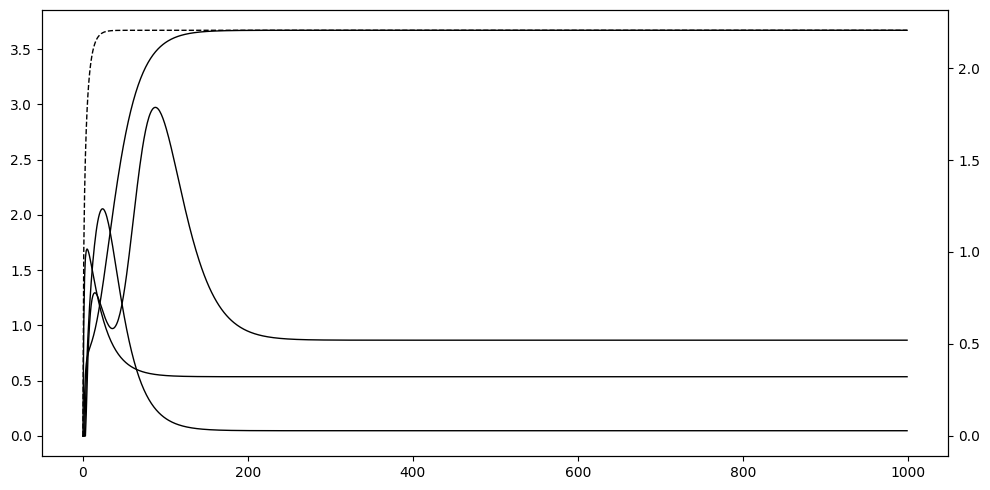

In [11]:
model = Model1(N, RHO, ALPHA)

fig = plt.figure(figsize=(10, 5), dpi=100)
ax = fig.add_subplot()
twinax = ax.twinx()

S = []
T = 1000
for i in range(T):
    S.append(model.s.copy())

    x = 1
    # x = 0.1 if i < 500 else 0
    # x = 0.1 if i < T//4 else (0.5 if i < T//2 else 1.0)
    # x = abs(math.sin(0.01*i))
    # x = np.ones(N)*0.1
    # x = np.linspace(0, 1, N)
    # x = 0.01*np.sin(i*np.linspace(1e-3, 1e-2, N))
    # x = np.abs(np.sin(0.01*i))+np.linspace(1e-3, 1, N)

    model.update(x)

S = np.array(S).transpose()

# ax.imshow(S, cmap='inferno')

for i, s in enumerate(S[1:]):
    ax.plot(range(T), s, label=f'{i+1}', lw=1, c='black')
twinax.plot(range(T), S[0], lw=1, ls='--', c='black', label=f'0')

plt.tight_layout()
plt.show()